Amir Navon Oct'2019

<H1 Style=color:blue> Stack Exchange Data Analysis <H1>

Stack Exchange is a network of sites, allowing different communities learn and share their knowledge.
Movies & TV Stack Exchange - is one of this sites, focused entirely on questions and answers regarding movies and series.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.disable_notebook()

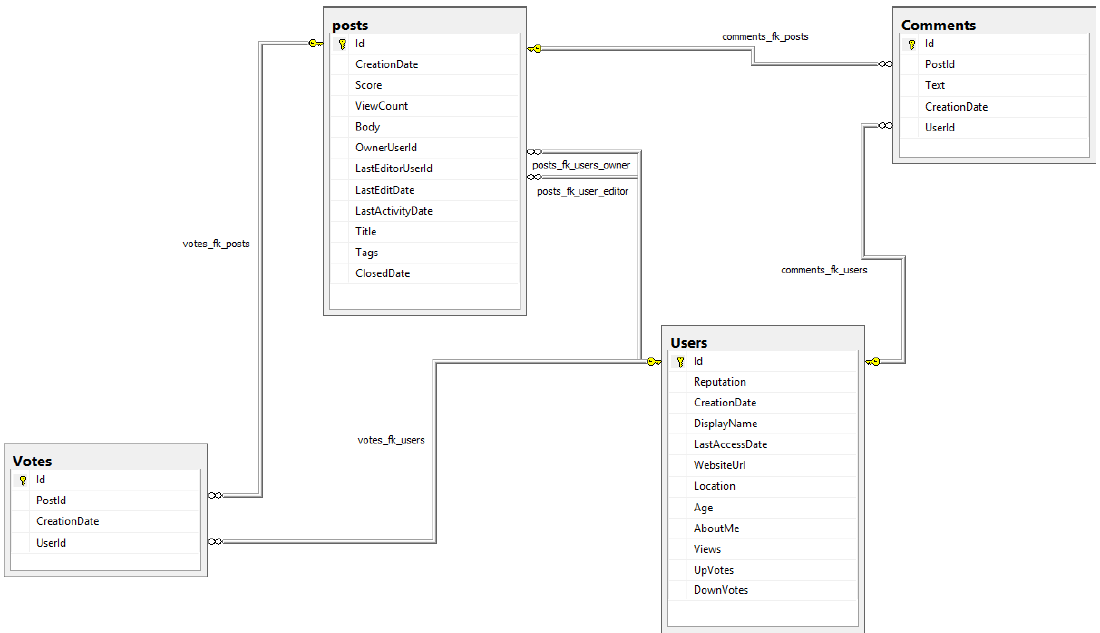

In [3]:
from IPython.display import Image
Image(filename='ERD_stack_exchange.PNG')

<H1 Style=color:blue> posts <H1>

In [4]:
posts = pd.read_csv(
    filepath_or_buffer = 'Posts.csv',
    delimiter = ',',
    header = 0,
    dtype = {'Id':int,
             'Score':int,
             'ViewCount':int,
             'Body':str,
             'OwnerUserId':int,
             'LastEditorUserId':int,
             'Title':str,
             'Tags':str,
            },
    index_col = 'Id',
    parse_dates = ['CreationDate','LastEditDate','LastActivityDate','ClosedDate']
)

<H1 Style=color:blue> comments <H1>

In [5]:
comments = pd.read_csv(
    filepath_or_buffer = 'comments.csv',
    delimiter = ',',
    header = 0,
    dtype = {'Id':int,
             'PostId':int,
             'Text':str,
             'UserId':int,           
    },
    index_col = 'Id',
    parse_dates = ['CreationDate']
)

<H1 Style=color:blue> users <H1>

In [6]:
 users = pd.read_csv(
     filepath_or_buffer = 'Users.csv',
     delimiter = ',',
     header = 0,
     dtype = {'Id':int,
              'Reputation':int,
              'DisplayName':str,
              'WebsiteUrl':str,
              'Location':str,
              'Age':float,
              'AboutMe':str,
              'Views':int,
              'UpVotes':int,
              'DownVotes':int,
     },
     index_col = 'Id',
     parse_dates = ['CreationDate','LastAccessDate']
 )

<H1 Style=color:blue> votes <H1>

In [7]:
votes = pd.read_csv(
    filepath_or_buffer = 'Votes.csv',
    delimiter = ',',
    header = 0,
    dtype = {'Id':int,
             'PostId':int,
             'UserId':int,
            },
    index_col = 'Id',
    parse_dates = ['CreationDate']
)

<H1 Style=color:blue> 1 : Basic Analysis <H1>
    <B Style=color:red> How many post were made each year? <B>

In [8]:
years = posts.groupby(posts['CreationDate'].dt.year)['OwnerUserId'].count().to_frame()\
.reset_index().rename(columns={'OwnerUserId':'Total posts','CreationDate':'Year'})
years.set_index('Year')

,Total posts
Year,
2011,156
2012,1065
2013,1018


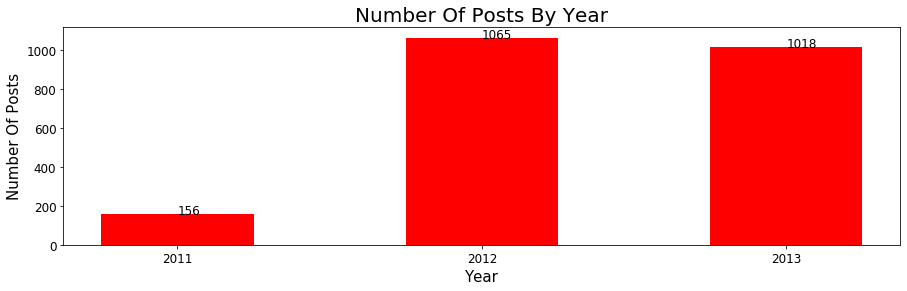

In [13]:
x_axis= years['Year'].astype(str)
y_axis= years['Total posts']       

plt.figure(figsize = (15,4))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=15) 

plt.bar(x_axis,y_axis,width= 0.5,color='r')
plt.xlabel('Year')
plt.ylabel('Number Of Posts')
plt.title('Number Of Posts By Year')
#plt.tight_layout()
for i,j in zip(x_axis,y_axis):
    plt.annotate(str(j),xy=(i,j),fontsize=12,)   
plt.show()

<H1 Style=color:blue> 2 : Basic Analysis <H1>
    <B Style=color:red> How many votes were made in each day of the week? <B>

In [20]:
days = votes.groupby(votes['CreationDate'].dt.weekday_name)['PostId'].count().to_frame()\
.reset_index().rename(columns={'PostId':'Total votes','CreationDate':'WeekDay'})
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days['WeekDay'] = pd.Categorical(days['WeekDay'], categories=cats, ordered=True)
weekdays = days.sort_values('WeekDay')
weekdays.set_index('WeekDay')

,Total votes
WeekDay,
Monday,282
Tuesday,354
Wednesday,554
Thursday,869
Friday,735
Saturday,376
Sunday,189


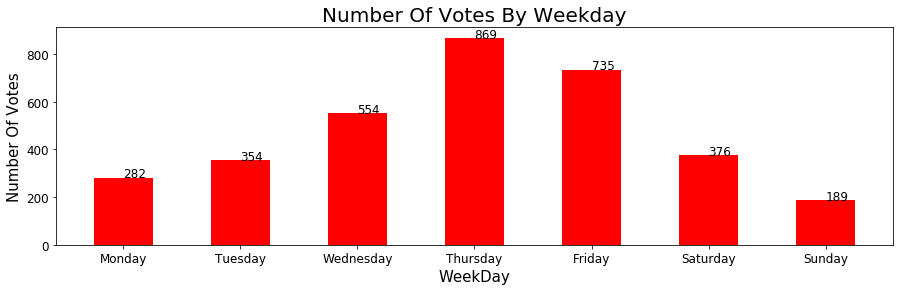

In [22]:
x_axis= weekdays['WeekDay']
y_axis= weekdays['Total votes']

plt.figure(figsize = (15,4))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=15) 

plt.bar(x_axis,y_axis,width=0.5,color='r')
plt.xlabel('WeekDay')
plt.ylabel('Number Of Votes')
plt.title('Number Of Votes By Weekday')
#plt.tight_layout()
for i,j in zip(x_axis,y_axis):
    plt.annotate(str(j),xy=(i,j), fontsize=12)
plt.show()

<H1 Style=color:blue> 3 : Basic Analysis <H1>
    <B Style=color:red> List all comments created on September 19'th 2012 <B>

In [23]:
mask = comments["CreationDate"].between('19-09-2012','20-09-2012')
comments[mask].rename_axis('Comment_Id')

,PostId,Text,CreationDate,UserId
Comment_Id,,,,
3476,887,I had the same thoughts. I'm wondering if ther...,2012-09-19 10:34:12.983,233
3623,890,"hmmm he's described as ""an over-the-top public...",2012-09-19 18:23:37.193,126


<H1 Style=color:blue> 4 : Basic Analysis <H1>
    <B Style=color:red> List all users under the age of 33, living in London <B>

In [24]:
mask1 = users['Age'] < 33
mask2 = users['Location'].str.contains('London', case= False)
user_sort = users[mask1 & mask2][['DisplayName','Location','Age']].sort_values('Age', ascending=False).reset_index()
user_sort.index = user_sort.index + 1
user_sort

,Id,DisplayName,Location,Age
1,710,wim,"London, United Kingdom",32.0
2,1039,AlasdairCM,"London, United Kingdom",32.0
3,160,Willbill,"London, United Kingdom",31.0
4,819,yuji,"London, United Kingdom",30.0
5,717,JHarris,"London, UK",29.0
6,1750,Alex Florescu,"London, United Kingdom",27.0
7,473,bobble14988,"London, United Kingdom",26.0
8,1174,Oliver G,"London, UK",26.0
9,823,Edd,"London, United Kingdom",25.0
10,27,Noldorin,"London, United Kingdom",24.0


<H1 Style=color:blue> 1 : Advanced Analysis <H1>
    <B Style=color:red> Display the number of votes for each post title <B>

In [25]:
g_votes = votes.groupby('PostId')['CreationDate'].count().to_frame().reset_index().rename(columns={'CreationDate':'Num_of_votes'})
join_g_votes_p = g_votes.merge(posts, how='inner', right_index=True, left_index=True)
join_g_votes_p[['PostId','Num_of_votes','Title']].sort_values('Num_of_votes', ascending=False).set_index('PostId').head()

,Num_of_votes,Title
PostId,,
133,27,Is there a rating of the 3D-ness of a 3D movie?
130,26,"Shiny and new in ""vehicle mode"", yet battle-da..."
13,26,"Are there any ""Hollywood-style"" movies made in..."
5,25,What does the ending of The Tree of Life mean?
35,23,Why are there a lot of Hollywood-remakes of su...


<H1 Style=color:blue> 2 : Advanced Analysis <H1>
    <B Style=color:red> Display posts with comments created by users living in the same location as the post creator <B>

<B Style=color:green> Method A <B>

In [26]:
join_comment_user = comments.merge(users, how='inner', left_on='UserId', right_index=True)
join_post_user = posts.merge(users, how='inner', left_on='OwnerUserId', right_index=True)
join_general = join_comment_user.merge(join_post_user, how='inner', left_on='PostId', right_index=True)
join_general['is_equal']= (join_general['Location_x'] == join_general['Location_y'])
mask = join_general['is_equal'] ==True
join_general[mask][['UserId','Location_x','Text','Body','PostId','OwnerUserId','Location_y']]\
.reset_index().rename(columns={'Id':'Commentid','UserId':'C_OwnerID','Location_x':'C_Location',
'Text':'Comment_Text','Body':'Post_Body','OwnerUserId':'P_OwnerID','Location_y':'P_Location'}).set_index('Commentid')

,C_OwnerID,C_Location,Comment_Text,Post_Body,PostId,P_OwnerID,P_Location
Commentid,,,,,,,
30,1312,"Sydney, Australia",That does not explain exactly why she would ha...,<p>Thriller about a group of kidnappers wearin...,952,1312,"Sydney, Australia"
3809,293,Sweden,Wikipedia's got [an article too long to summar...,"<p>After watching ""The Looper"", I could not un...",1139,1632,Sweden
750,1221,Sweden,Indeed. I remember from the cartoons that they...,"<p>Having recently seen <em>The Hobbit</em>, I...",1239,835,Sweden
1668,52,Missouri,Yep - a terrific film.,<p>In Mr. Monk and the Three Pies we meet Adri...,819,52,Missouri
2726,535,Canada,I believe Rosamund Pike's character was Androm...,"<p>In the movie <a href=""http://www.imdb.com/t...",1440,1590,Canada


<B Style=color:green> Method B <B>

In [27]:
join_comment_user = comments.merge(users, how='inner', left_on='UserId', right_index=True).reset_index()
join_post_user = posts.merge(users, how='inner', left_on='OwnerUserId', right_index=True)
join_general = join_comment_user.merge(join_post_user, how='inner', left_on=['PostId','Location'], right_on=['Id','Location'])
join_general.dropna(subset=['Location'])[['Id','UserId','Text','Body','PostId','OwnerUserId','Location']]\
.rename(columns={'Id':'Commentid','UserId':'C_OwnerID','Text':'Comment_Text','Body':'Post_Body','OwnerUserId':'P_OwnerID'})\
.set_index('Commentid')

,C_OwnerID,Comment_Text,Post_Body,PostId,P_OwnerID,Location
Commentid,,,,,,
30,1312,That does not explain exactly why she would ha...,<p>Thriller about a group of kidnappers wearin...,952,1312,"Sydney, Australia"
750,1221,Indeed. I remember from the cartoons that they...,"<p>Having recently seen <em>The Hobbit</em>, I...",1239,835,Sweden
1668,52,Yep - a terrific film.,<p>In Mr. Monk and the Three Pies we meet Adri...,819,52,Missouri
2726,535,I believe Rosamund Pike's character was Androm...,"<p>In the movie <a href=""http://www.imdb.com/t...",1440,1590,Canada
3809,293,Wikipedia's got [an article too long to summar...,"<p>After watching ""The Looper"", I could not un...",1139,1632,Sweden


<H1 Style=color:blue> 3 : Advanced Analysis <H1>
    <B Style=color:red> How many users have never voted? <B>

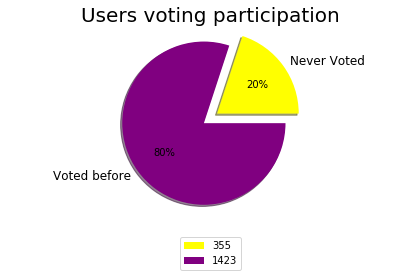

In [28]:
users['voted'] = users.index.isin(votes['UserId'])
user_vote = users.groupby('voted')['voted'].count()
p_size= np.array(user_vote)
p_label= 'Never Voted','Voted before'
p_colors= ['yellow','purple']
plt.pie(p_size, labels=p_label, colors=p_colors, autopct='%.f%%', shadow=True, explode=(0.1,0.1))
plt.title('Users voting participation')
plt.axis('equal')
plt.legend(user_vote, loc=9, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.show()

<H1 Style=color:blue> 4 : Advanced Analysis <H1>
    <B Style=color:red> Display all posts having the highest amount of comments <B>

In [29]:
agg_com = comments.groupby('PostId')['CreationDate'].count().to_frame().rename(columns={'CreationDate':'count'}).reset_index()
mask = agg_com['count'] == agg_com['count'].max()
join_top_com_post = agg_com[mask].merge(posts, how='inner', left_on='PostId', right_index=True)
join_top_com_post[['PostId','CreationDate','OwnerUserId','Title','Tags','count']]\
.rename(columns={'count':'Num_Of_Comments'}).set_index('PostId')

,CreationDate,OwnerUserId,Title,Tags,Num_Of_Comments
PostId,,,,,
64,2011-12-07 16:26:39.080,54,"In Iron Man, why is Tony Stark fooled for so l...",<iron-man>,5
166,2012-01-04 06:37:04.190,1525,What is Jerusalem worth?,<plot-explanation><kingdom-of-heaven>,5
404,2012-04-09 23:11:31.240,1287,Who nukes the USA in The Divide?,<plot-explanation><the-divide>,5
515,2012-05-13 20:33:26.050,573,Plot summaries for the other two movies relate...,<movie-franchise><moon>,5
1100,2012-12-10 14:03:28.250,1702,"How much money did it take to run ""The Sting""?",<plot-explanation><the-sting>,5
1282,2013-01-15 13:39:36.783,1338,Old movie about two pilots and a cheating wife,<identify-this-movie>,5
1304,2013-01-20 21:54:25.203,859,How does the budget breakdown for a US TV seas...,<tv-shows>,5
1479,2013-03-11 15:15:25.300,1298,Aliens took over the satellite,<identify-this-tv-show><comedy>,5
1750,2013-05-26 11:36:32.807,754,Why doesn’t Shosanna try to kill Fredrick?,<plot-explanation><inglourious-basterds>,5


<B Style=color:green> overview <B>

In [30]:
agg_com = comments.groupby('PostId')['CreationDate'].count().to_frame()
agg_post = agg_com.groupby('CreationDate')['CreationDate'].count().to_frame().rename(columns={'CreationDate':'Num_Of_Posts'})
agg_post.index = agg_post.index.rename('Num_Of_Comments')
agg_post.sort_index(ascending=False)

,Num_Of_Posts
Num_Of_Comments,
5,10
4,39
3,129
2,281
1,477


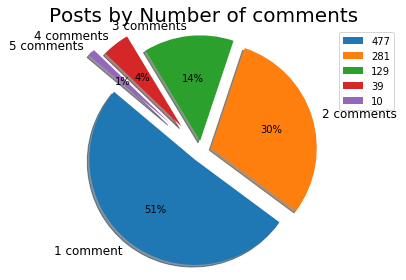

In [31]:
agg_com = comments.groupby('PostId')['CreationDate'].count().to_frame()
agg_post = agg_com.groupby('CreationDate')['CreationDate'].count().to_frame().rename(columns={'CreationDate':'Num_Of_Posts'})
p_size = np.array(agg_post['Num_Of_Posts'])
p_label = '1 comment','2 comments','3 comments','4 comments','5 comments'
plt.pie(p_size, labels=p_label, autopct='%.f%%',startangle=140, shadow=True, explode=(0.1,0.1,0.1,0.3,0.4))
plt.title('Posts by Number of comments')
plt.axis('equal')
plt.legend(p_size)
plt.tight_layout()
plt.show()

<H1 Style=color:blue> 5 : Advanced Analysis <H1>
    <B Style=color:red> For each post, how many votes are coming from users living in Canada?
        What's their percentage of the total number of votes<B>

<B Style=color:green> Canada votes percentage per post <B>

In [32]:
users['Is_Canada']= users['Location'].str.contains('Canada', case= False, na=False).astype(int)
join_vote_user = votes.merge(users, how='inner', left_on='UserId', right_index=True).reset_index()\
.rename(columns={'Id':'VoteId'})
gr_join = join_vote_user.groupby('PostId')
gr_join_agg= gr_join.agg({'VoteId':'count', 'Is_Canada':'sum'})\
.rename(columns={'VoteId':'Num_Of_Votes','Is_Canada':'Votes_From_Canada'})
gr_join_agg['Canada_Voters_Percentage']= round(np.multiply(np.divide(gr_join_agg['Votes_From_Canada']\
,gr_join_agg['Num_Of_Votes']),100),2).astype(str)+'%'
mask = gr_join_agg['Votes_From_Canada'] != 0
gr_join_agg[mask].head()

,Num_Of_Votes,Votes_From_Canada,Canada_Voters_Percentage
PostId,,,
1,14,1,7.14%
10,6,1,16.67%
12,13,1,7.69%
13,26,1,3.85%
18,13,1,7.69%


<B Style=color:green> Canada percentage from all of the votes <B>

In [33]:
round(np.multiply(np.divide(np.sum(gr_join_agg['Votes_From_Canada']),np.sum(gr_join_agg['Num_Of_Votes'])),100),2)\
.astype(str)+'%'

'3.07%'

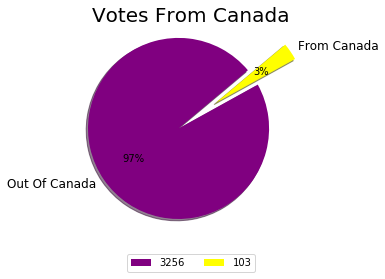

In [34]:
users['Is_Canada']= users['Location'].str.contains('Canada', case= False, na=False).astype(int)
join_vote_user = votes.merge(users, how='inner', left_on='UserId', right_index=True).reset_index()\
.rename(columns={'Id':'VoteId'})
gr_join = join_vote_user.groupby('Is_Canada')['VoteId'].count()

p_size = np.array(gr_join)
p_label = 'Out Of Canada','From Canada'
p_colors= ['purple','yellow']
plt.pie(p_size, labels=p_label, colors=p_colors, autopct='%.f%%',startangle=40, shadow=True, explode=(0.1,0.4))
plt.title('Votes From Canada')
plt.axis('equal')
plt.legend(p_size,loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.show()

<H1 Style=color:blue> 6 : Advanced Analysis <H1>
    <B Style=color:red> How many hours in average, it takes to the first comment to be posted after a creation of a new post <B>

In [35]:
f_com = comments.groupby('PostId')['CreationDate'].min().to_frame().rename(columns={'CreationDate':'First_Comment'})
join_f_com_post = f_com.merge(posts, how='inner', left_index=True, right_index=True)
join_f_com_post['diff_in_hours']= join_f_com_post['First_Comment'] - join_f_com_post['CreationDate']
join_f_com_post['diff_in_hours']= join_f_com_post['diff_in_hours']/np.timedelta64(1,'h')
join_f_com_post['diff_in_hours'].mean().round(3).astype(str)+'  Hours average for creation of first comment'

'7.152  Hours average for creation of first comment'

<H1 Style=color:blue> 7 : Advanced Analysis <H1>
    <B Style=color:red> What's the most common post tag? <B>

<B Style=color:green> Method A <B>

In [36]:
my_tags = posts['Tags'].str.replace('<',',').str.replace('>','').str.slice(1).str.split(',')
my_list=[]
def my_func (column):
    for i in column:
        my_list.append(i)
my_tags.apply(my_func)
all_tags = pd.DataFrame(my_list, columns=['Tags'])
all_tags.groupby('Tags')['Tags'].count().to_frame().rename(columns={'Tags':'Num_Of_Tags'}).\
sort_values('Num_Of_Tags', ascending=False).head(1)

,Num_Of_Tags
Tags,
plot-explanation,665


<B Style=color:green> Method B <B>

In [37]:
my_tags = posts['Tags'].str.replace('<',',').str.replace('>','').str.slice(1).str.split(',',expand=True)

frames = [my_tags[0], my_tags[1], my_tags[2], my_tags[3], my_tags[4]]
result = pd.concat(frames).dropna().to_frame().rename(columns={0:'Tags'})

group = result.groupby('Tags')['Tags'].count().to_frame().rename(columns={'Tags':'Count'})
group.sort_values('Count', ascending=False).head(1)

,Count
Tags,
plot-explanation,665


<H1 Style=color:blue> 8 : Advanced Analysis <H1>
    <B Style=color:red> Create a pivot table displaying how many posts were created for each year (Y axis)
        and each month (X axis)<B>

In [38]:
posts['Year']= posts['CreationDate'].dt.year
posts['Month']= posts['CreationDate'].dt.month_name()
cats = ['January','February','March','April','May','June','July','August','September','October','November','December']
posts['Month'] = pd.Categorical(posts['Month'], categories=cats, ordered=True)
posts.pivot_table(index='Year', columns=['Month'], values='CreationDate', aggfunc='count', fill_value=0)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2011,0,0,0,0,0,0,0,0,0,1,15,140
2012,92,72,62,88,93,105,105,81,60,75,77,155
2013,129,99,107,92,130,120,134,143,64,0,0,0
